In [89]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info.operators import Operator
import numpy as np
from typing import List
from qiskit.visualization import plot_histogram

### Deustch algoritmas (uždaviniai D1,D2,D3)

1. **(D1)** Parašykite funkciją, kuri pagal užduotą vieno  kubito Deustch funkciją sukonstruoja atitinkamą unitarinę matricą $U_f$ Deustch algoritmui. Deustch funkcija perduodama kaip dviejų simbolių tekstinė eilutė. Pvz. '10' reiškia, kad $f(0)=1$, o $f(1)=0$

In [90]:
def constructUnitary(values:str) -> Operator:
    if values == "00":
        matrix = np.identity(4)
    elif values == "01":
        matrix = np.array([[1, 0, 0, 0], # generalize this
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]])
    elif values == "10":
        matrix = np.array([[0, 1, 0, 0],
                            [1, 0, 0, 0],
                            [0, 0, 1, 0],
                            [0, 0, 0, 1]])
    elif values == "11":
        matrix = np.array([[0, 0, 1, 0],
                            [0, 0, 0, 1],
                            [1, 0, 0, 0],
                            [0, 1, 0, 0]])
    else:
        raise ValueError("Invalid input")
    return Operator(matrix)

2. **(D2)** Panaudokite anksčiau parašytą funkciją nuosavai Deustch algorimo implementacijai qiskit aplinkoje.

{'1': 1024}


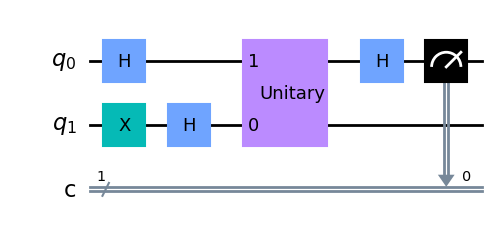

In [91]:
def deuchAlgorithm(qc:QuantumCircuit, values:str = "10"):
    qc.x(1)
    # qc.barrier()
    qc.h(0)
    qc.h(1)
    qc.append(constructUnitary(values), [1,0])
    qc.h(0)

qc = QuantumCircuit(2,1)
deuchAlgorithm(qc)
qc.measure(0, 0)

backend = Aer.get_backend('qasm_simulator')

job = execute(qc, backend)
result = job.result()
print (result.get_counts(qc))
qc.draw(output='mpl')

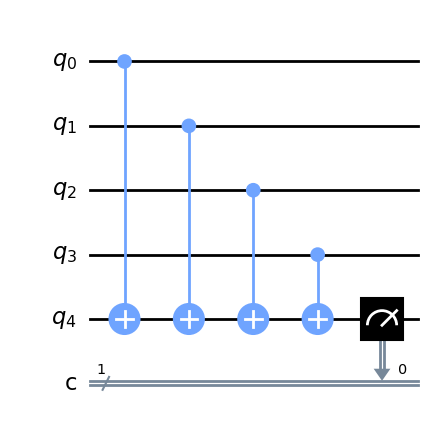

In [92]:
def onesCount() -> int:
    measureQubit = 4
    qubits = [0,1,2,3]
    qc = QuantumCircuit(5)
    for i in range(len(qubits)):
        qc.cx(i, measureQubit)
    return qc.to_gate()
qc = QuantumCircuit(5,1)
qc.append(onesCount(), [0,1,2,3,4])
qc.measure(4, 0)

backend = Aer.get_backend('qasm_simulator')
qc.decompose().draw(output='mpl')

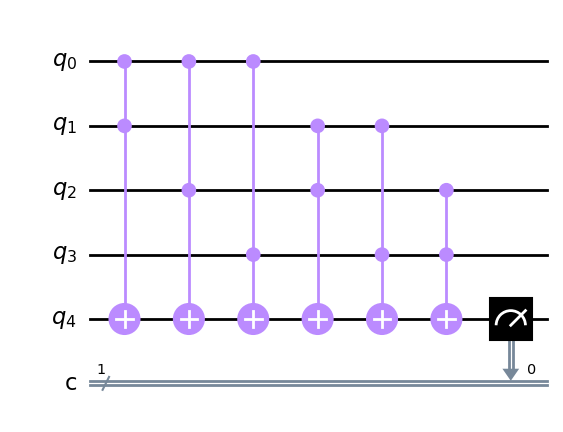

In [93]:
def countTwos():
    qc = QuantumCircuit(5)
    qubits = [0,1,2,3]
    measureQubit = 4
    for i in range(len(qubits)):
        for j in range(i+1, len(qubits)):
            if list[i] != list[j]:
                qc.ccx(i, j, measureQubit)
    return qc.to_gate()

qc = QuantumCircuit(5,1)
qc.append(countTwos(), [0,1,2,3,4])
qc.measure(4, 0)

backend = Aer.get_backend('qasm_simulator')
qc.decompose().draw(output='mpl')



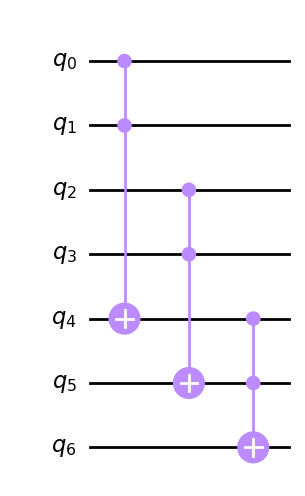

In [94]:
def ccccx():
    qc = QuantumCircuit(7)
    qubitsToMeasure = [0,1,2,3]
    carryQubits = [4,5]
    measureQubit = 6
    if len(qubitsToMeasure) != 4 and len(carryQubits) != 2:
        raise ValueError("Invalid input")
    for i in range(len(carryQubits)):
        qc.ccx(qubitsToMeasure[i*len(carryQubits)], qubitsToMeasure[i*len(carryQubits)+1], carryQubits[i])
    qc.ccx(carryQubits[0], carryQubits[1], measureQubit)
    return qc.to_gate()

qc = QuantumCircuit(7)
qc.append(ccccx(), [0,1,2,3,4,5,6])
qc.decompose().draw(output='mpl')

1. **(D3)** Sukurkite qiskit schemą, kuri turi 4 įvesties kubitus ir kuri kievienam iš jų lygiagrečiai realizuoja  Deustsch algoritmą. Schema turi paskaičiuoti kiek balansuotų funkcijų buvo panaudota.

balanced:  3


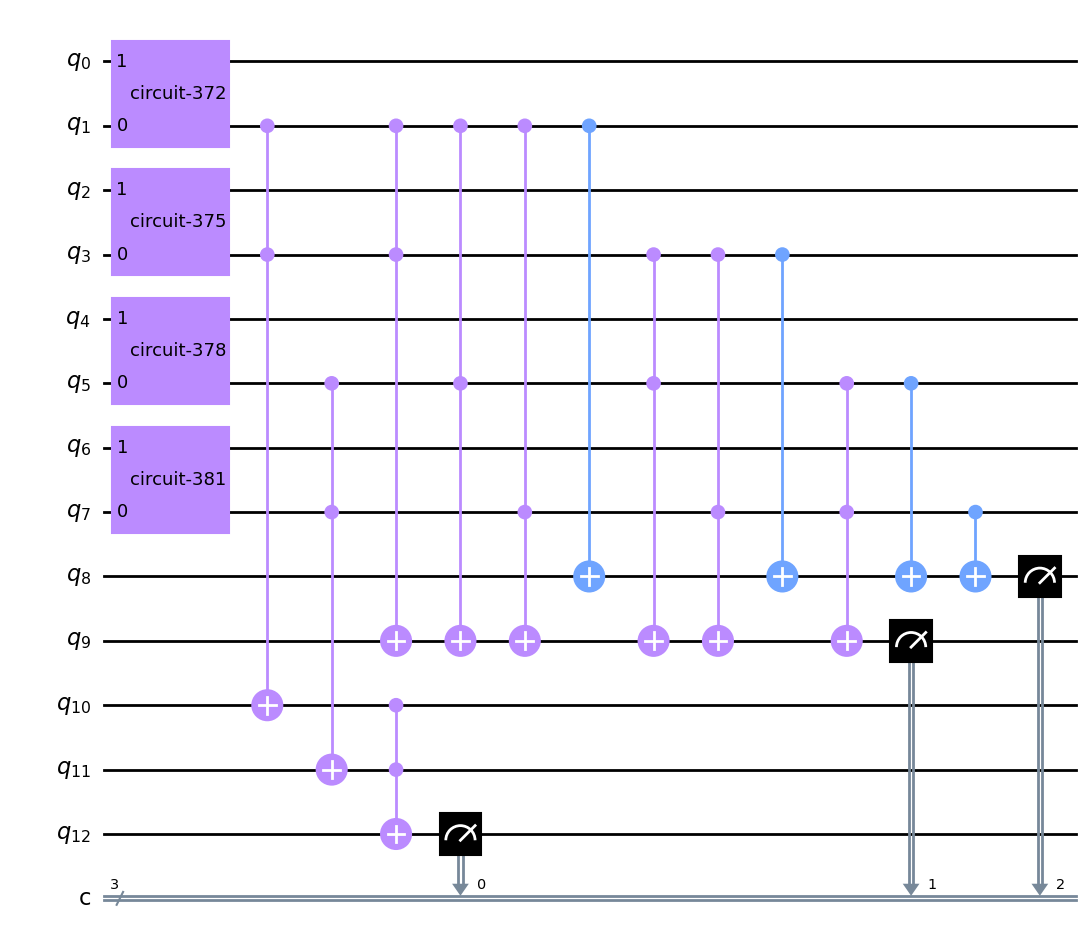

In [95]:
def deuchtToGate(values:str = "00"):
    qc = QuantumCircuit(2)
    deuchAlgorithm(qc, values)
    return qc.to_gate()

def fourQubitsDeuchAlgorithm(values:List[str] = ["00", "00"]):
    qc = QuantumCircuit(8)
    for i in range(4):
        qc.append(deuchtToGate(values[i]), [2*i+1, 2*i])
    return qc.to_gate()

def countQubitsDeuch(qc:QuantumCircuit,values:List[str] = ["00", "00"]) -> int:
    qc.append(fourQubitsDeuchAlgorithm(values), range(8))
    qc.append(ccccx(), [1,3,5,7,10,11,12])
    qc.append(countTwos(), [1,3,5,7,9])
    qc.append(onesCount(), [1,3,5,7,8])
    qc.measure([12,9,8],[0,1,2])

    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    result = job.result()
    counts = result.get_counts(qc)
    count = int((list(counts.keys())[0])[::-1], 2)
    return count

qc = QuantumCircuit(8+5,3)
functions: List[str] = ["10", "01", "01", "00"]
countBalanced = countQubitsDeuch(qc, functions)
print ("balanced: ", countBalanced) 

qc.decompose().draw(output='mpl')

In [96]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'110': 1024}


### Deutsch-Jozsa algoritmas (uždaviniai DJ1, DJ2)

1. **(DJ1)** Pagal analogiją su uždaviniu **D1** sukurkite 4 kubitų funkciją, kuri konstruoja $U_f$  matricą Deutsch-Jozsa algoritmui pagal reikšmių tekstinę eilutę. Jeigu Deutsch-Jozsa  funkcija nėra konstanta ar subalansuota reikia grąžinti None. Pvz. eilutė '1111000011110000' atitinka tokią funkciją:


| q3| q2| q1| q0| f |
|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 1 |
| 0 | 0 | 0 | 1 | 1 |
| 0 | 0 | 1 | 0 | 1 |
| 0 | 0 | 1 | 1 | 1 |
| 0 | 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 | 0 |
| 1 | 0 | 0 | 0 | 1 |
| 1 | 0 | 0 | 1 | 1 |
| 1 | 0 | 1 | 0 | 1 |
| 1 | 0 | 1 | 1 | 1 |
| 1 | 1 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 0 | 0 |
| 1 | 1 | 1 | 1 | 0 |

In [97]:
def constructUnitaryMatrix(input:str)-> Operator:
    ones = 0
    zeros = 0
    size = len(input)*2
    for i in range(len(input)):
        if input[i] == '1':
            ones += 1
        elif input[i] == '0':
            zeros += 1
    if zeros == 0 or ones == 0:
        return Operator(np.identity(size))
    if ones != zeros:
        raise ValueError("Invalid input")
  
    matrix = np.zeros((size, size))
    for i in range(len(input)):
        if input[i] == '1':
            matrix[2*i][2*i+1] = 1
            matrix[2*i+1][2*i] = 1
        elif input[i] == '0':
            matrix[2*i][2*i] = 1
            matrix[2*i+1][2*i+1] = 1
    # add name to operator
    op = Operator(matrix)
    op.name = 'oracle'
    return op

op = constructUnitaryMatrix("00")
print (op)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


2. (**DJ2**) Panaudokite anksčiau parašytą funkciją nuosavai Deustch-Jozsa algorimo implementacijai qiskit aplinkoje.

{'0000': 1024}
counts:  {'0000': 1024}
balanced:  False


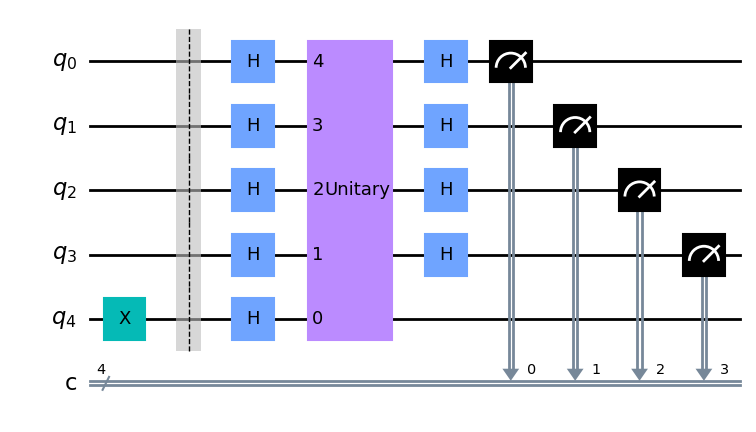

In [98]:
def deuchJozsaAlgorithm(input:str = "1010101010101010"):
    # check if amount of ones is equal to amount of zeros
   
    
    size = int(np.log2(len(input)))
    qc = QuantumCircuit(size+1, size)
    qc.x(size)
    qc.barrier()
    qc.h(range(size+1))

    qc.append(constructUnitaryMatrix(input), range(size,-1,-1))
    qc.h(range(size))
    qc.measure(range(size), range(size))
    return qc

# input = "1010101010101010"
# input = "1001"
input = "0000000000000000"
qc = deuchJozsaAlgorithm(input)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()
counts = result.get_counts(qc)
print (counts)

balanced = list(counts.keys())[0].count('1') > 0 
print ("counts: ", counts)
print ("balanced: ", balanced)
qc.draw(output='mpl')

### Bernstein-Vazirani problema

1. (**BV1**) Parašykite funkciją, kuri pagal nurodytą bitų  skaičių generuoja atsitiktinę Bernstein-Vazirani funkciją.


2. (**BV2**) Parašykite *klasikinę* funkciją, kuri pagal *n*-bitų  funkciją, kuri užduota kaip tekstinė eilutė (panašiai kaip **DJ1** uždavinyje), patikrina ar ji yra Bernstein-Vazirani funkcija.


False
function: 1101
actual value: 1101


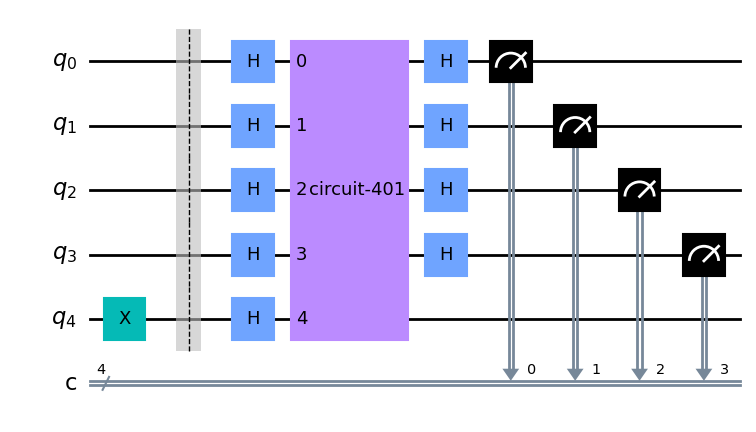

In [99]:
import numpy as np
from qiskit import QuantumCircuit, execute, Aer

def constructBVGate(gate, qubits = 4) -> QuantumCircuit:
    size = qubits
    qc = QuantumCircuit(size+1, size)
    qc.x(size)
    qc.barrier()
    qc.h(range(size+1))
    qc.append(gate(), range(size+1))
    qc.h(range(size))
    qc.measure(range(size), range(size))
    return qc

class BernsteinVarizaniAlgorithm:
    def __init__(self, size) -> None:
        self.seq = ""
        self.size = size
        self.generateRandomBernsteinVarizaniFunction(size)
    
    def generateRandomBernsteinVarizaniFunction(self, size:int = 4):
        self.seq = ""
        for _ in range(size):
            self.seq += str(np.random.randint(2))

    def classicalBernsteinVarizaniAlgorithm(self, input:str) -> bool:
        if len(input) != len(self.seq):
            raise ValueError("Invalid input")
        for i in range(len(input)):
            if input[i] != self.seq[i]:
                return False
        return True
    
    def quantumBernsteinVarizaniAlgorithm(self):
        qc = QuantumCircuit(self.size+1)
        for i in range(self.size):
            if self.seq[i] == '1':
                qc.cx(i, self.size)
        return qc.to_gate()

n = 4
bv = BernsteinVarizaniAlgorithm(size=n)
print (bv.classicalBernsteinVarizaniAlgorithm("1010"))

qc = constructBVGate(bv.quantumBernsteinVarizaniAlgorithm, qubits=n)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()
counts = result.get_counts(qc)
print ("function:",str(list(counts.keys())[0])[::-1])
print ("actual value:",bv.seq)

qc.draw(output='mpl')



```
# This is formatted as code
```

(**SA1**) Naudodami vartus X, CNOT, ir CCNOT sukurkite pilną kvantinę shemą 5 bitų Simono  algorimui pagal duotąjį binarinį vektorių **s** Jūsų variantui (13).Funkcijos reikšmes *tinkamai* parinkite savarankiškai.


13. s = 01110;



In [100]:
s = "01110" # the hidden bitstring

assert 1 < len(s) < 20, "The length of s must be between 2 and 19"

for c in s:
    assert c == "0" or c == "1", "s must be a bitstring of '0' and '1'"
    
n = len(s) #the length of the bitstring

In [101]:
# Step 1
# Creating registers

def Simon(qc,n,s):
    # Step 2
    # Apply Hadamard gates before querying the oracle
    for i in range(n):
        qc.h(i)

    # Apply barrier to mark the beginning of the blackbox function
    qc.barrier()

    # Step 3 query the blackbox function
    # copy the content of the first register to the second register
    for i in range(n):
        qc.cx(i, n+i)

    # get the least index j such that s_j is "1"
    j = -1
    for i, c in enumerate(s):
        if c == "1":
            j = i
            break

    # Creating 1-to-1 or 2-to-1 mapping with the j-th qubit of x as control to XOR the second register with s
    for i, c in enumerate(s):
        if c == "1" and j >= 0:
            qc.cx(j, n+i) #the i-th qubit is flipped if s_i is 1

    # get random permutation of n qubits
    perm = list(np.random.permutation(n))

    #initial position
    init = list(range(n))
    i = 0
    while i < n:
        if init[i] != perm[i]:
            k = perm.index(init[i])
            qc.swap(n+i, n+k) #swap qubits
            init[i], init[k] = init[k], init[i] #marked swapped qubits
        else:
            i += 1
            
    # randomly flip the qubit
    for i in range(n):
        if np.random.random() > 0.5:
            qc.x(n+i)

    # Apply the barrier to mark the end of the blackbox function
    qc.barrier()
    # Step 4 apply Hadamard gates to the first register
    for i in range(n):
      qc.h(i)
    
    # Step 5 perform measurement on the first register
    for i in range(n):
        qc.measure(i, i)

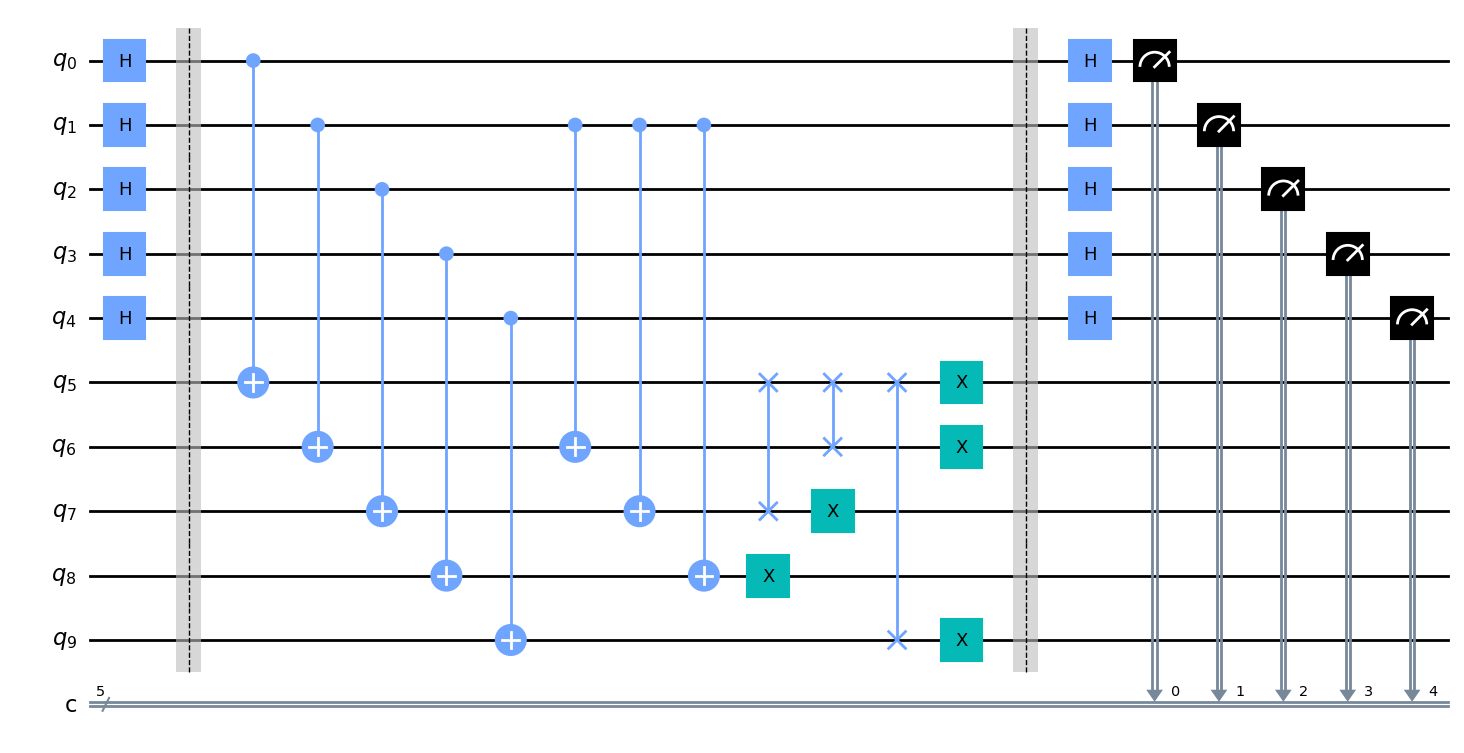

In [102]:
simonCircuit = QuantumCircuit(2*n, n)
Simon(simonCircuit, n, s)


simonCircuit.draw(output='mpl')

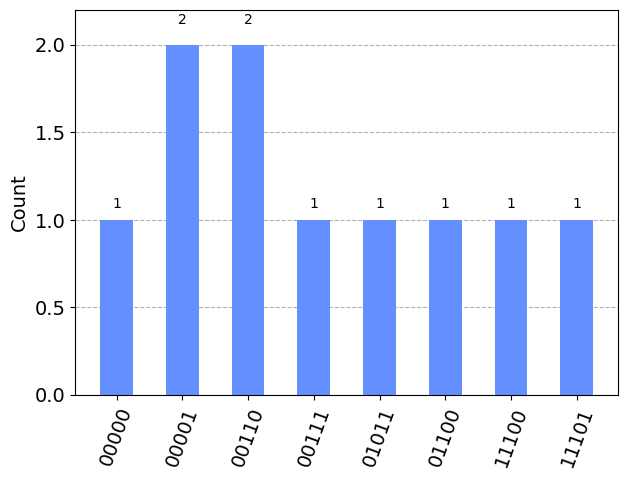

In [103]:
# use local simulator
backend = Aer.get_backend("qasm_simulator")
# the number of shots is twice the length of the bitstring
shots = 2*n
job = execute(simonCircuit, backend=backend, shots=shots)
answer = job.result().get_counts()

plot_histogram(answer)

In [104]:
# Post-processing step
# Constructing the system of linear equations Y s = 0
# By k[::-1], we reverse the order of the bitstring
lAnswer = [ (k[::-1],v) for k,v in answer.items() if k != "0"*n  ] #excluding the trivial all-zero
#Sort the basis by their probabilities
lAnswer.sort(key = lambda x: x[1], reverse=True)

Y = []
for k, v in lAnswer:
    Y.append( [ int(c) for c in k ] )


#import tools from sympy
from sympy import Matrix, mod_inverse


Y = Matrix(Y)

#pprint(Y)

#Perform Gaussian elimination on Y
Y_transformed = Y.rref(iszerofunc=lambda x: x % 2==0) # linear algebra on GF(2) 

#to convert rational and negatives in rref of linear algebra on GF(2)
def mod(x,modulus):
    numer, denom = x.as_numer_denom()
    return numer*mod_inverse(denom,modulus) % modulus

Y_new = Y_transformed[0].applyfunc(lambda x: mod(x,2)) #must takecare of negatives and fractional values
#pprint(Y_new)

print("The hidden bistring s[ 0 ], s[ 1 ]....s[",n-1,"] is the one satisfying the following system of linear equations:")
rows, cols = Y_new.shape
for r in range(rows):
    Yr = [ "s[ "+str(i)+" ]" for i, v in enumerate(list(Y_new[r,:])) if v == 1 ]
    if len(Yr) > 0:
        tStr = " + ".join(Yr)
        print(tStr, "= 0")

The hidden bistring s[ 0 ], s[ 1 ]....s[ 4 ] is the one satisfying the following system of linear equations:
s[ 0 ] = 0
s[ 1 ] + s[ 3 ] = 0
s[ 2 ] + s[ 3 ] = 0
s[ 4 ] = 0


2.(**SA2**) Vadovėlyje „ Noson S. Yanofsky and Mirco A. Mannucci. Quantum computing for computer scientists“ nuo puslapio 190 pateikta Simono algoritmo  analizė konkrečiai funkcijai  $\{0,1\}^3 → \{0,1\}^3$. Naudodamiesi **sympy** moduliu atlkite tokią pat analizę Jūsų pasirinktai funkcijai iš ankstesnės (**SA1**) užduoties.

In [107]:
# from qiskit import Aer, QuantumCircuit, transpile, assemble
# from qiskit.visualization import plot_histogram

# def initialize_s(qc, qubits):
#     """Apply a Hadamard gate to all qubits in the list."""
#     for q in qubits:
#         qc.h(q)

# def oracle(qc, target_qubit): #bad 
#     """Apply a phase oracle to the target qubit."""
#     qc.z(target_qubit)

# def diffusion(qc, qubits):
#     """Apply the diffusion operator to the qubits."""
#     # Apply Hadamard gates
#     qc.h(qubits)
#     # Apply X gates
#     qc.x(qubits)
#     # Apply controlled-Z gate
#     qc.h(qubits[-1])
#     qc.mct(qubits[:-1], qubits[-1])
#     # Apply X gates
#     qc.x(qubits)
#     # Apply Hadamard gates
#     qc.h(qubits)

# def grovers_algorithm(n, marked_items):
#     # Create a quantum circuit with n qubits and n classical bits
#     qc = QuantumCircuit(n, n)
    
#     # Initialize the superposition of all states
#     initialize_s(qc, range(n))
    
#     # Define the number of Grover iterations (adjust as needed)
#     num_iterations = int(0.5 * (2 ** (n / 2)))
    
#     # Apply Grover iterations
#     for _ in range(num_iterations):
#         # Apply the oracle to mark the solution(s)
#         oracle(qc, marked_items)
        
#         # Apply the diffusion operator
#         diffusion(qc, range(n))
    
#     # Measure the qubits
#     qc.measure(range(n), range(n))
    
#     # Simulate the quantum circuit
#     simulator = Aer.get_backend('qasm_simulator')
#     compiled_circuit = transpile(qc, simulator)
#     result = simulator.run(compiled_circuit).result()
    
#     # Get and plot the result
#     counts = result.get_counts(qc)
#     plot_histogram(counts)

# # Example usage
# n_qubits = 3  # Number of qubits
# marked_items = [4]  # Indices of marked items

# grovers_algorithm(n_qubits, marked_items)